In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from calpycles.pycles_ensemble import PyCLESensemble
import os
import numpy as np

from data_loaders import load_nature
from data_loaders import model_names
from data_loaders import make_namelist_settings

# location
this_path = os.path.abspath("")
data_folder = os.path.join(this_path,"data/")

Using custom matplotlib style from 'mplstyle' file


In [3]:
# use the same parameter samples as for WENO_FULLRES (which was run before)

param_file = os.path.join(data_folder,"WENO_FULLRES/DYCOMS_RF01_large_smallT_N64_seed0/samples_parameters_unconstrained.npy")
param_samples = np.load(param_file)

Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Saved GaussRV mean and var to /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_LOWRES/DYCOMS_RF01_N64/dist_parameters_mean.npy; _covar.npy
Saved parameter samples (.npy, .nc, .txt) to  /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_LOWRES/DYCOMS_RF01_N64
Using specified parameter ranges to assemble dist_kwargs.


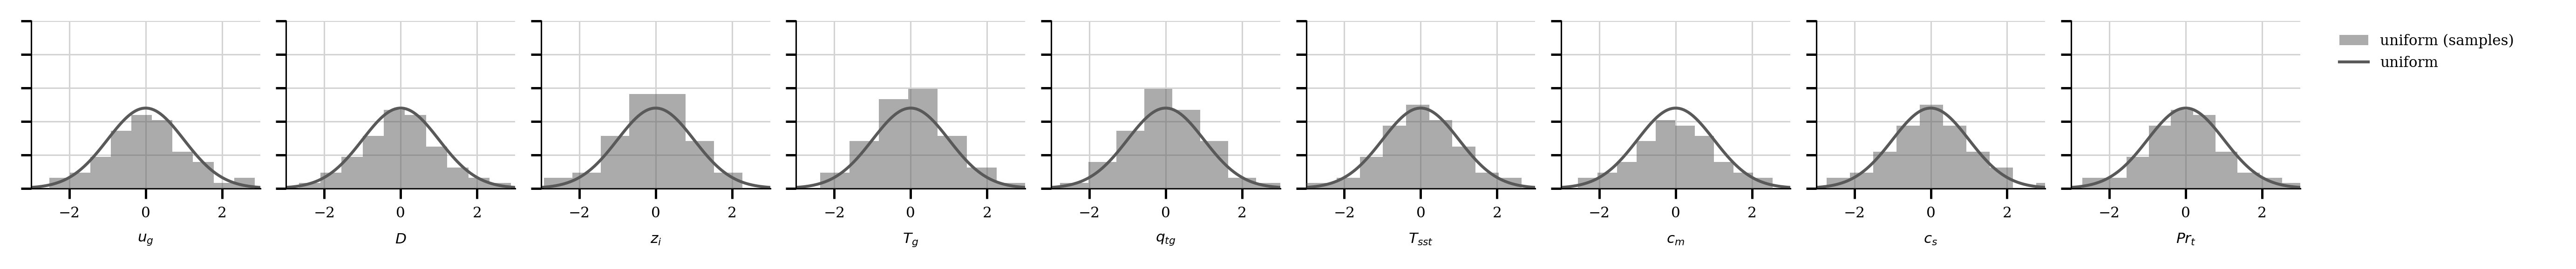

Saved figure  /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_LOWRES/DYCOMS_RF01_N64/fig-dists_1d_uniform_unconstrained


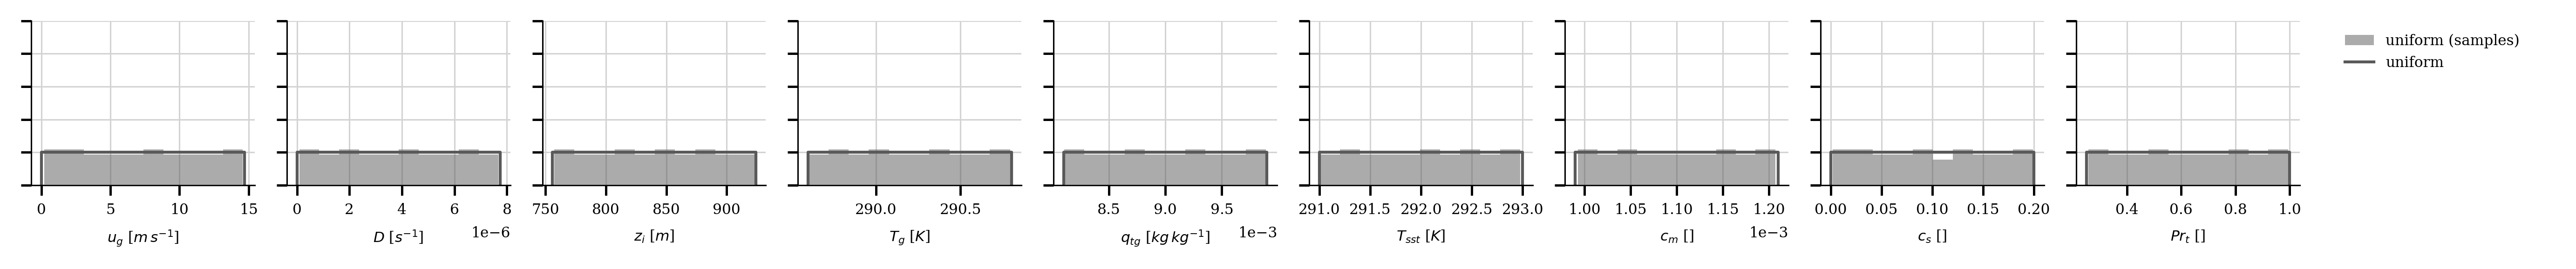

Saved figure  /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_LOWRES/DYCOMS_RF01_N64/fig-dists_1d_uniform_constrained
Using specified parameter ranges to assemble dist_kwargs.
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_LOWRES/DYCOMS_RF01_N64/0
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_LOWRES/DYCOMS_RF01_N64/1
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_LOWRES/DYCOMS_RF01_N64/2
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_LOWRES/DYCOMS_RF01_N64/3
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_LOWRES/DYCOMS_RF01_N64/4
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_LOWRES/DYCOMS_RF01_N64/5
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments

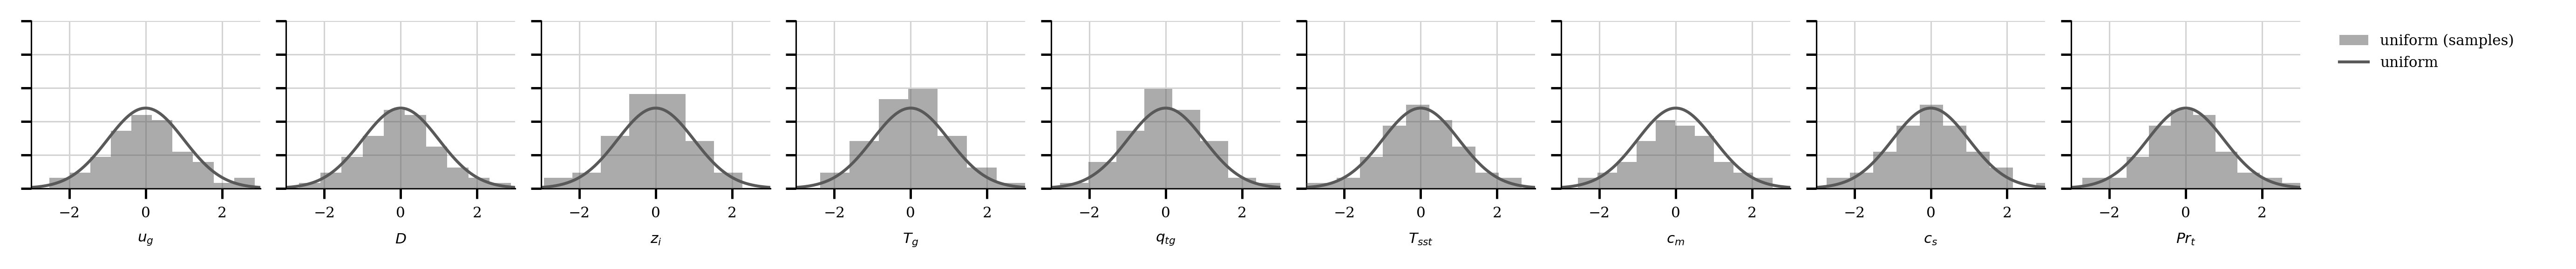

Saved figure  /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/MIXED_FULLRES/DYCOMS_RF01_N64/fig-dists_1d_uniform_unconstrained


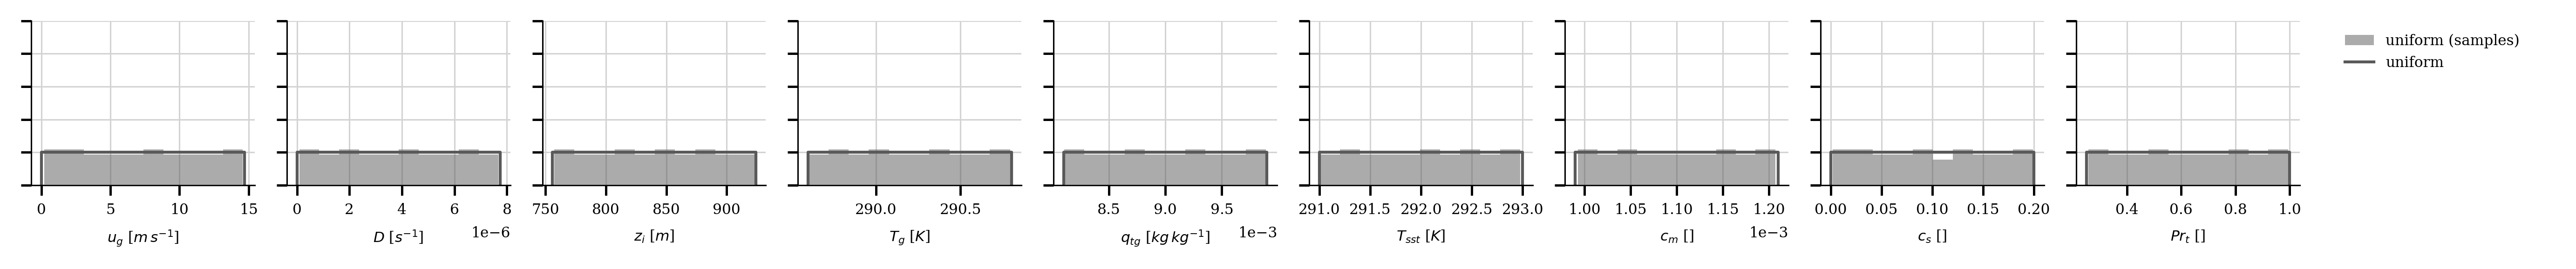

Saved figure  /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/MIXED_FULLRES/DYCOMS_RF01_N64/fig-dists_1d_uniform_constrained
Using specified parameter ranges to assemble dist_kwargs.
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/MIXED_FULLRES/DYCOMS_RF01_N64/0
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/MIXED_FULLRES/DYCOMS_RF01_N64/1
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/MIXED_FULLRES/DYCOMS_RF01_N64/2
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/MIXED_FULLRES/DYCOMS_RF01_N64/3
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/MIXED_FULLRES/DYCOMS_RF01_N64/4
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/MIXED_FULLRES/DYCOMS_RF01_N64/5
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_pap

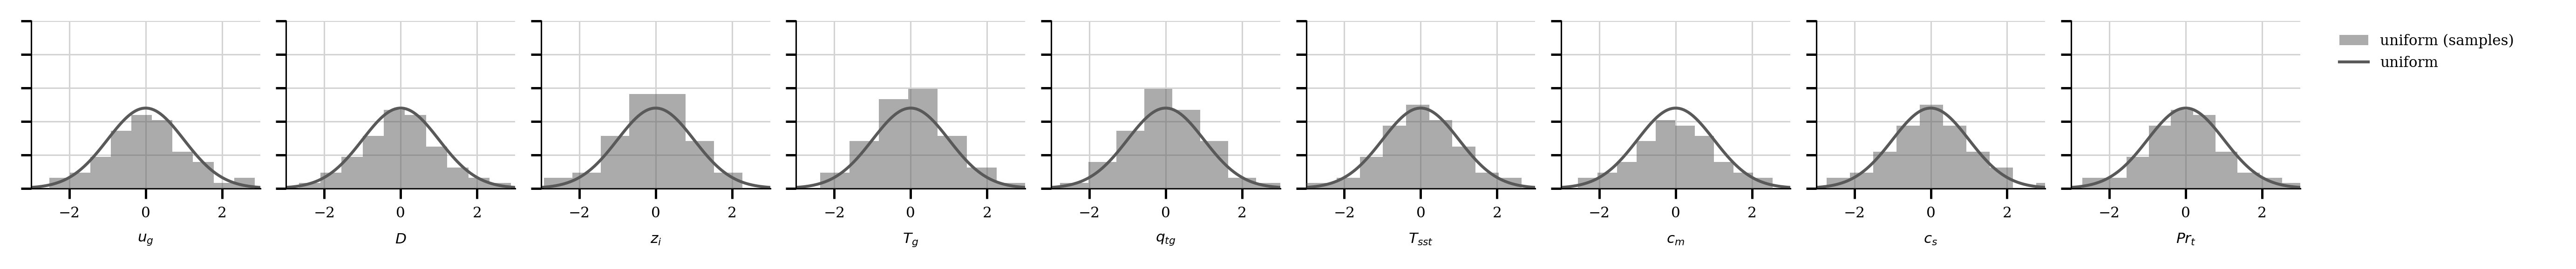

Saved figure  /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/CENTRAL_FULLRES/DYCOMS_RF01_N64/fig-dists_1d_uniform_unconstrained


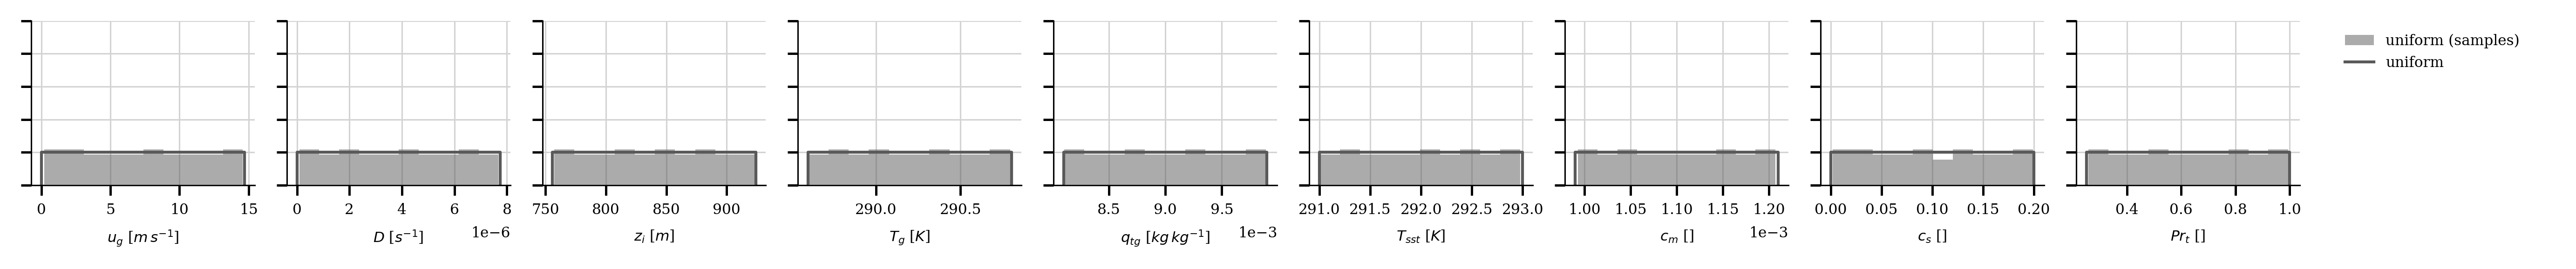

Saved figure  /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/CENTRAL_FULLRES/DYCOMS_RF01_N64/fig-dists_1d_uniform_constrained
Using specified parameter ranges to assemble dist_kwargs.
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/CENTRAL_FULLRES/DYCOMS_RF01_N64/0
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/CENTRAL_FULLRES/DYCOMS_RF01_N64/1
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/CENTRAL_FULLRES/DYCOMS_RF01_N64/2
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/CENTRAL_FULLRES/DYCOMS_RF01_N64/3
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/CENTRAL_FULLRES/DYCOMS_RF01_N64/4
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/CENTRAL_FULLRES/DYCOMS_RF01_N64/5
Wrote namelist to: /cluster/work/climate/dgrund/experim

In [4]:
# send ensembles to run in jobs
n_ens =64

for i, model_name in enumerate(model_names):
    if i==0:
        continue

    name = f"DYCOMS_RF01_N{n_ens}"

    ens = PyCLESensemble(
        name=name,
        n_samples=64,
        path=os.path.join(data_folder, model_name, name),
        verbose=True,
        test=False,
        case="DYCOMS_RF01",
    )

    # set parameter samples
    ens.param_ens.samples = param_samples
    ens.param_ens.plot()

    # initialize samples from these parameters
    ens.init_samples(  
        namelist_settings=make_namelist_settings(model_name)
    )
    for s in ens.samples:
        s.write_namelist()

    ens.run(
        submit_job=True,
        do_wait_and_clean=False,
    )


MIXED_FULLRES
Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/MIXED_FULLRES/DYCOMS_RF01_N64/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64...
... done loading samples for ensemble DYCOMS_RF01_N64.
Observation file not found: ./data/MIXED_FULLRES/DYCOMS_RF01_N64/samples_observations.nc. Please run observe().
Cleaning sample files of 0...
Cleaning sample files of 1...
Cleaning sample files of 2...
Cleaning sample files of 3...
Cleaning sample files of 4...
Cleaning sample files of 5...
Cleaning sample files of 6...
Cleaning sample files of 7...
Cleaning sample files of 8...
Cleaning sample files of 9...
Cleaning sample files of 10...
Cleaning sample files of 11...
Cleaning sample files of 12...
Cleaning sample files of 13...
Cleaning sample files of 14...
Cleaning sample files of 15...
Cleaning sample files of 16...
Cleaning sample files of

/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


	[create_mfdataset_with_nans()] Found 59 files.
	[create_mfdataset_with_nans()] Missing 5, namely [4, 25, 26, 45, 47]. Inserting nans for missing samples.


/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Saved full obs ensemble 'DYCOMS_RF01_N64' to
./data/MIXED_FULLRES/DYCOMS_RF01_N64/samples_observations_full_profiles.nc / _timeseries.nc.
Loaded observation DYCOMS_RF01_N64 from ('./data/MIXED_FULLRES/DYCOMS_RF01_N64/samples_observations_full_profiles.nc', './data/MIXED_FULLRES/DYCOMS_RF01_N64/samples_observations_full_timeseries.nc').
Computing observation ensemble profile stats...
Reading...
Computing...
Saving ./data/MIXED_FULLRES/DYCOMS_RF01_N64/ensemble_stats/Nens64_profiles_average_time_mean.nc...
Saving ./data/MIXED_FULLRES/DYCOMS_RF01_N64/ensemble_stats/Nens64_profiles_average_time_median.nc...
Saving ./data/MIXED_FULLRES/DYCOMS_RF01_N64/ensemble_stats/Nens64_profiles_average_time_CI.nc...
Done computing profiles ensemble stats.
Computing observation ensemble timeseries stats...
Reading...
Computing...
Saving ./data/MIXED_FULLRES/DYCOMS_RF01_N64/ensemble_stats/Nens64_timeseries_mean.nc...
Saving ./data/MIXED_FULLRES/DYCOMS_RF01_N64/ensemble_stats/Nens64_timeseries_median.nc...


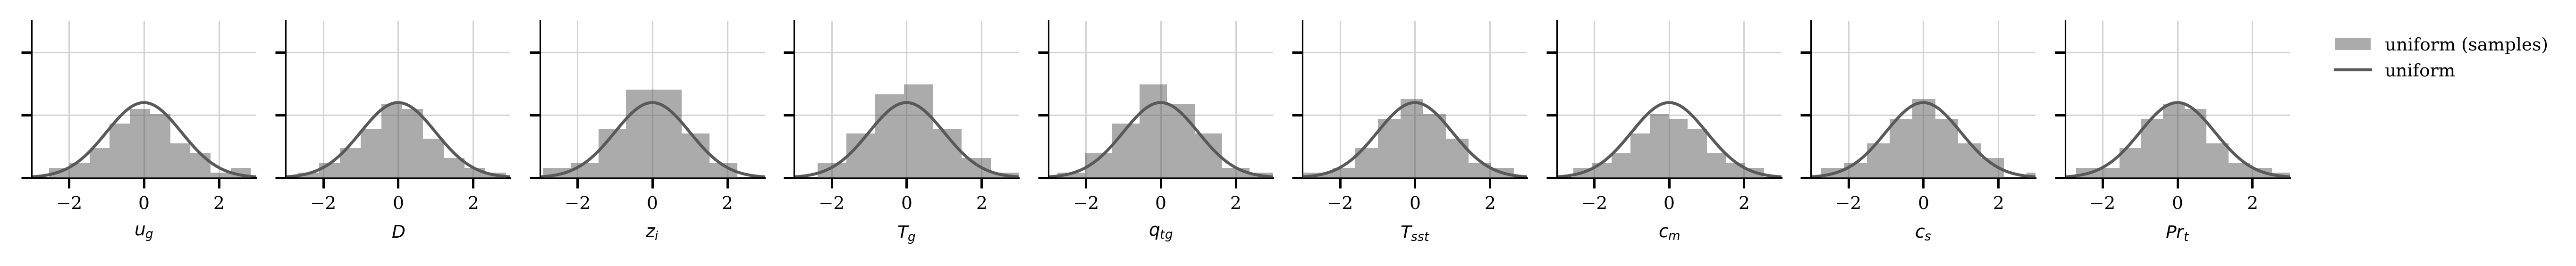

Saved figure  ./data/MIXED_FULLRES/DYCOMS_RF01_N64/fig-dists_1d_uniform_unconstrained


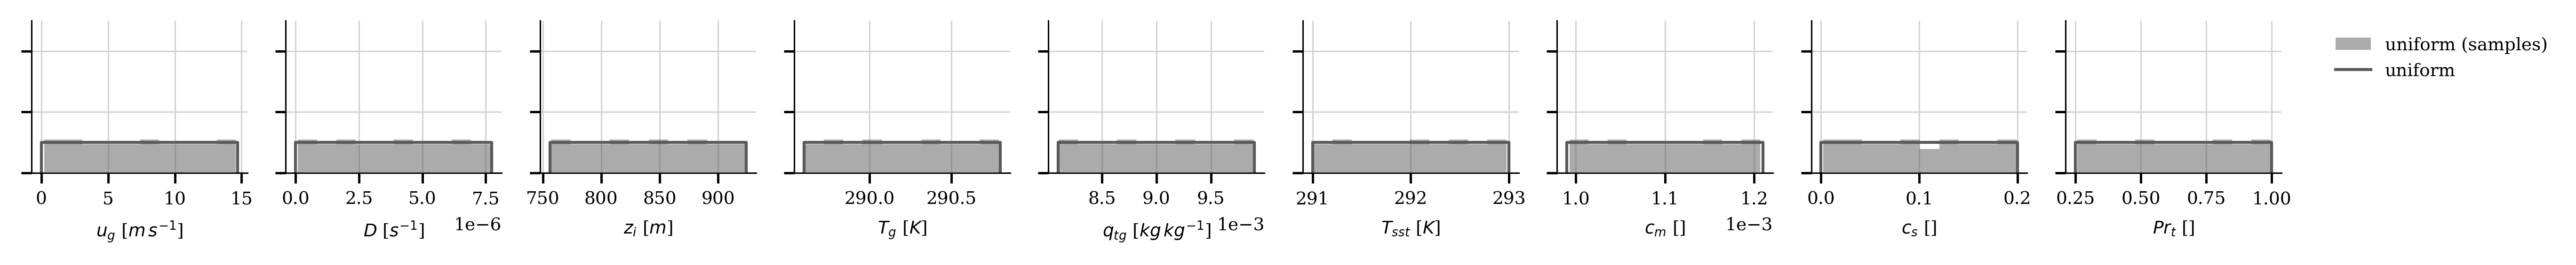

Saved figure  ./data/MIXED_FULLRES/DYCOMS_RF01_N64/fig-dists_1d_uniform_constrained


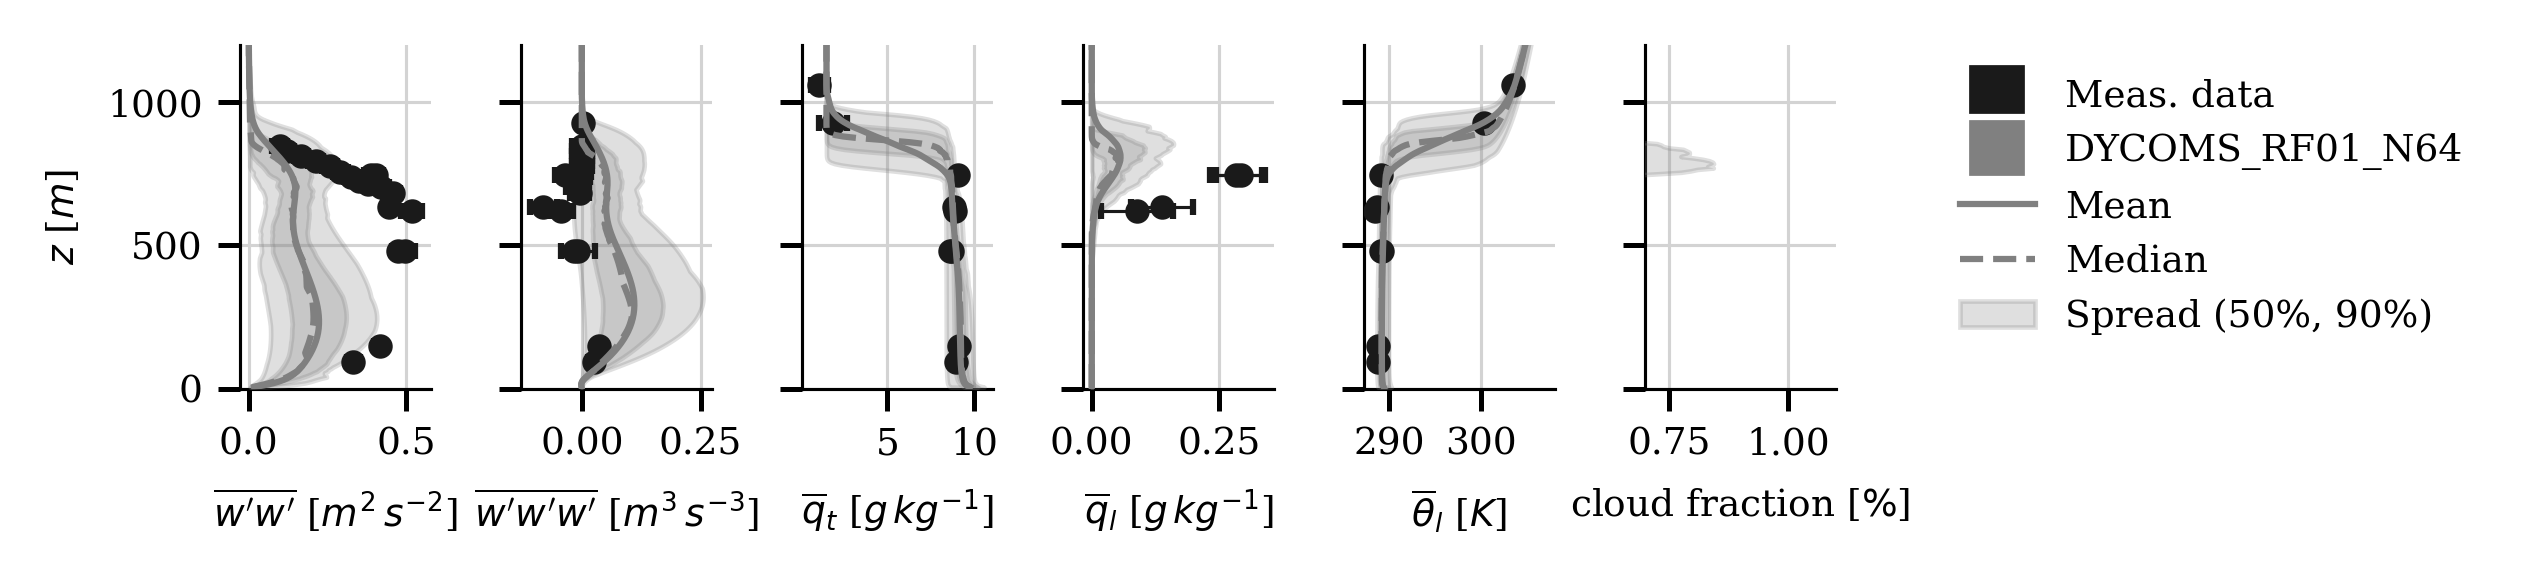

Saved figure  ./data/MIXED_FULLRES/DYCOMS_RF01_N64/fig-ensemble_obs_DYCOMS_RF01_N64_profiles


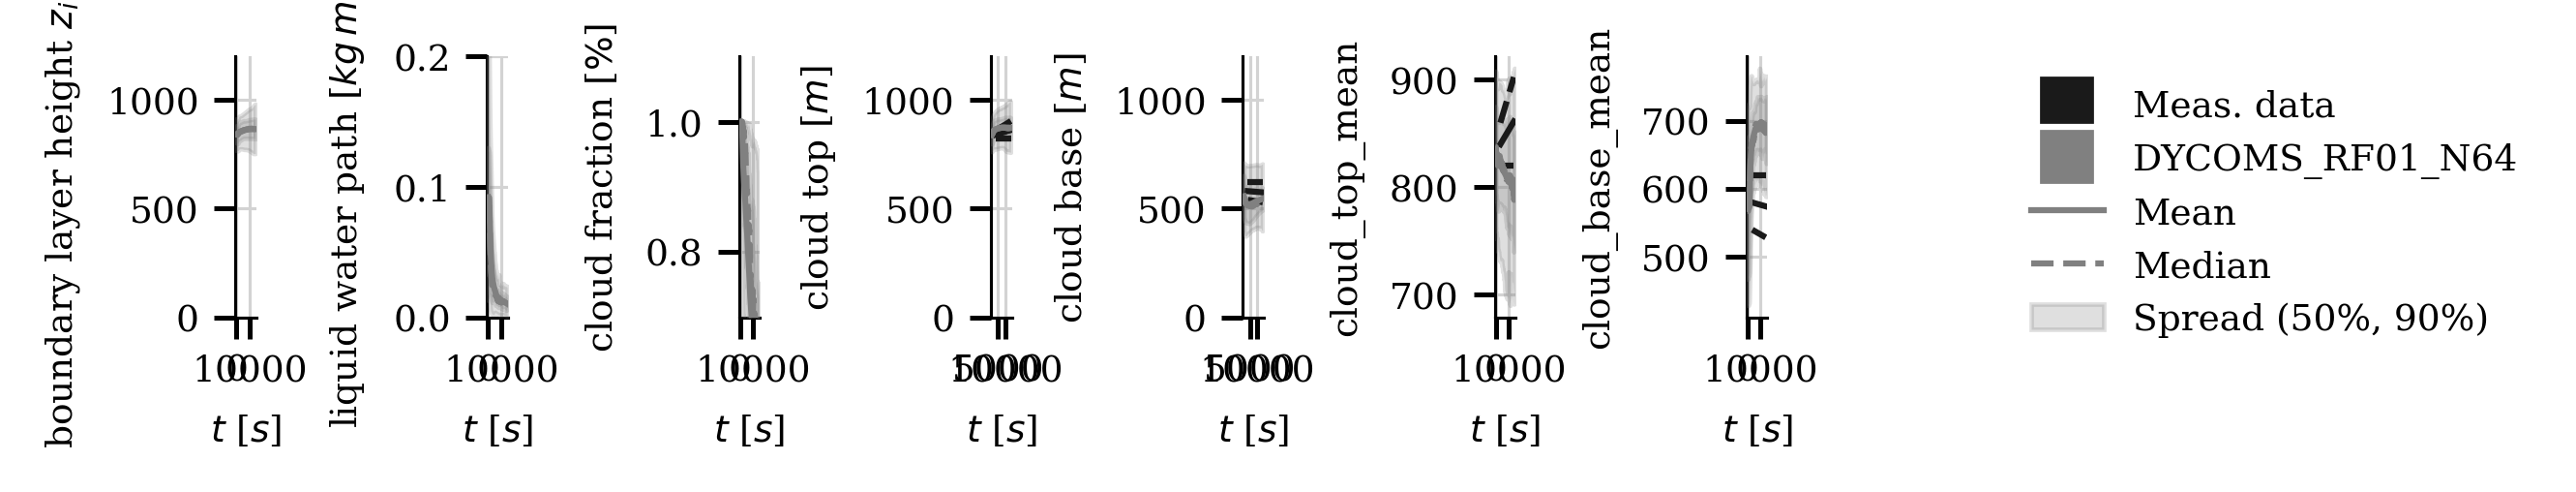

Saved figure  ./data/MIXED_FULLRES/DYCOMS_RF01_N64/fig-ensemble_obs_DYCOMS_RF01_N64_timeseries

CENTRAL_FULLRES
Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/CENTRAL_FULLRES/DYCOMS_RF01_N64/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64...
... done loading samples for ensemble DYCOMS_RF01_N64.
Observation file not found: ./data/CENTRAL_FULLRES/DYCOMS_RF01_N64/samples_observations.nc. Please run observe().
Cleaning sample files of 0...
Cleaning sample files of 1...
Cleaning sample files of 2...
Cleaning sample files of 3...
Cleaning sample files of 4...
Cleaning sample files of 5...
Cleaning sample files of 6...
Cleaning sample files of 7...
Cleaning sample files of 8...
Cleaning sample files of 9...
Cleaning sample files of 10...
Cleaning sample files of 11...
Cleaning sample files of 12...
Cleaning sample files of 13...
Cleaning sample 

/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


	[create_mfdataset_with_nans()] Found 59 files.
	[create_mfdataset_with_nans()] Missing 5, namely [4, 25, 26, 45, 47]. Inserting nans for missing samples.


/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Saved full obs ensemble 'DYCOMS_RF01_N64' to
./data/CENTRAL_FULLRES/DYCOMS_RF01_N64/samples_observations_full_profiles.nc / _timeseries.nc.
Loaded observation DYCOMS_RF01_N64 from ('./data/CENTRAL_FULLRES/DYCOMS_RF01_N64/samples_observations_full_profiles.nc', './data/CENTRAL_FULLRES/DYCOMS_RF01_N64/samples_observations_full_timeseries.nc').
Computing observation ensemble profile stats...
Reading...
Computing...
Saving ./data/CENTRAL_FULLRES/DYCOMS_RF01_N64/ensemble_stats/Nens64_profiles_average_time_mean.nc...
Saving ./data/CENTRAL_FULLRES/DYCOMS_RF01_N64/ensemble_stats/Nens64_profiles_average_time_median.nc...
Saving ./data/CENTRAL_FULLRES/DYCOMS_RF01_N64/ensemble_stats/Nens64_profiles_average_time_CI.nc...
Done computing profiles ensemble stats.
Computing observation ensemble timeseries stats...
Reading...
Computing...
Saving ./data/CENTRAL_FULLRES/DYCOMS_RF01_N64/ensemble_stats/Nens64_timeseries_mean.nc...
Saving ./data/CENTRAL_FULLRES/DYCOMS_RF01_N64/ensemble_stats/Nens64_timeseri

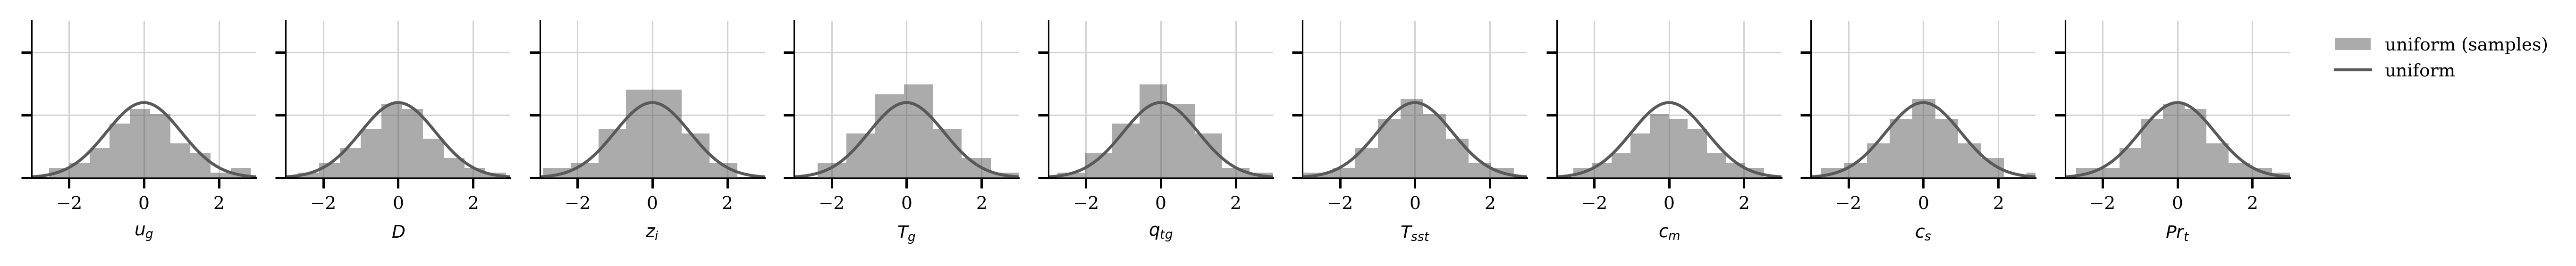

Saved figure  ./data/CENTRAL_FULLRES/DYCOMS_RF01_N64/fig-dists_1d_uniform_unconstrained


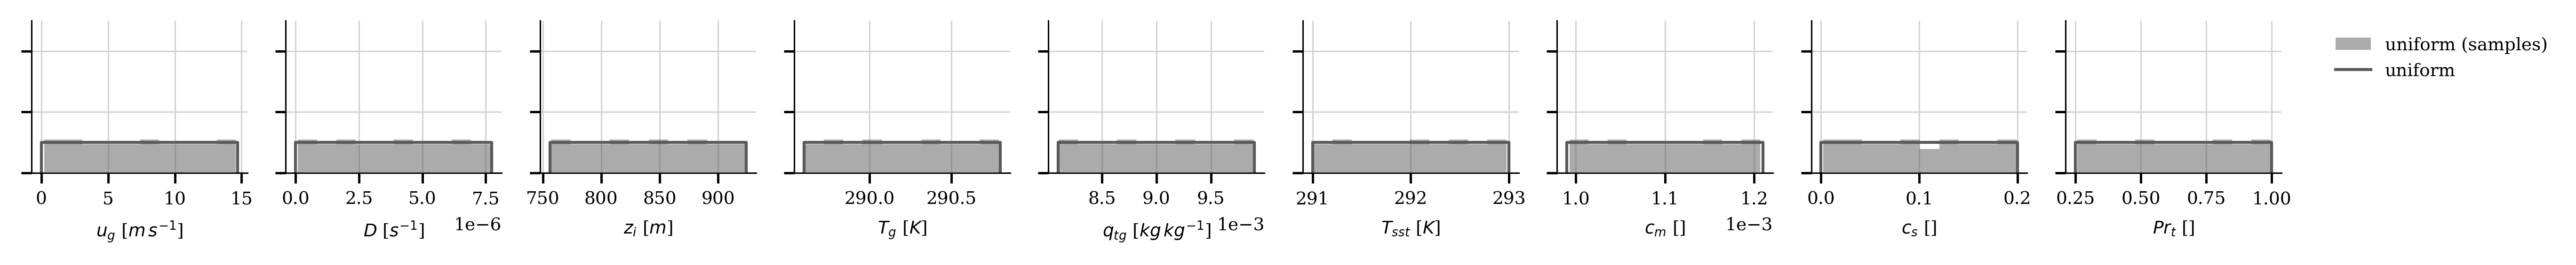

Saved figure  ./data/CENTRAL_FULLRES/DYCOMS_RF01_N64/fig-dists_1d_uniform_constrained


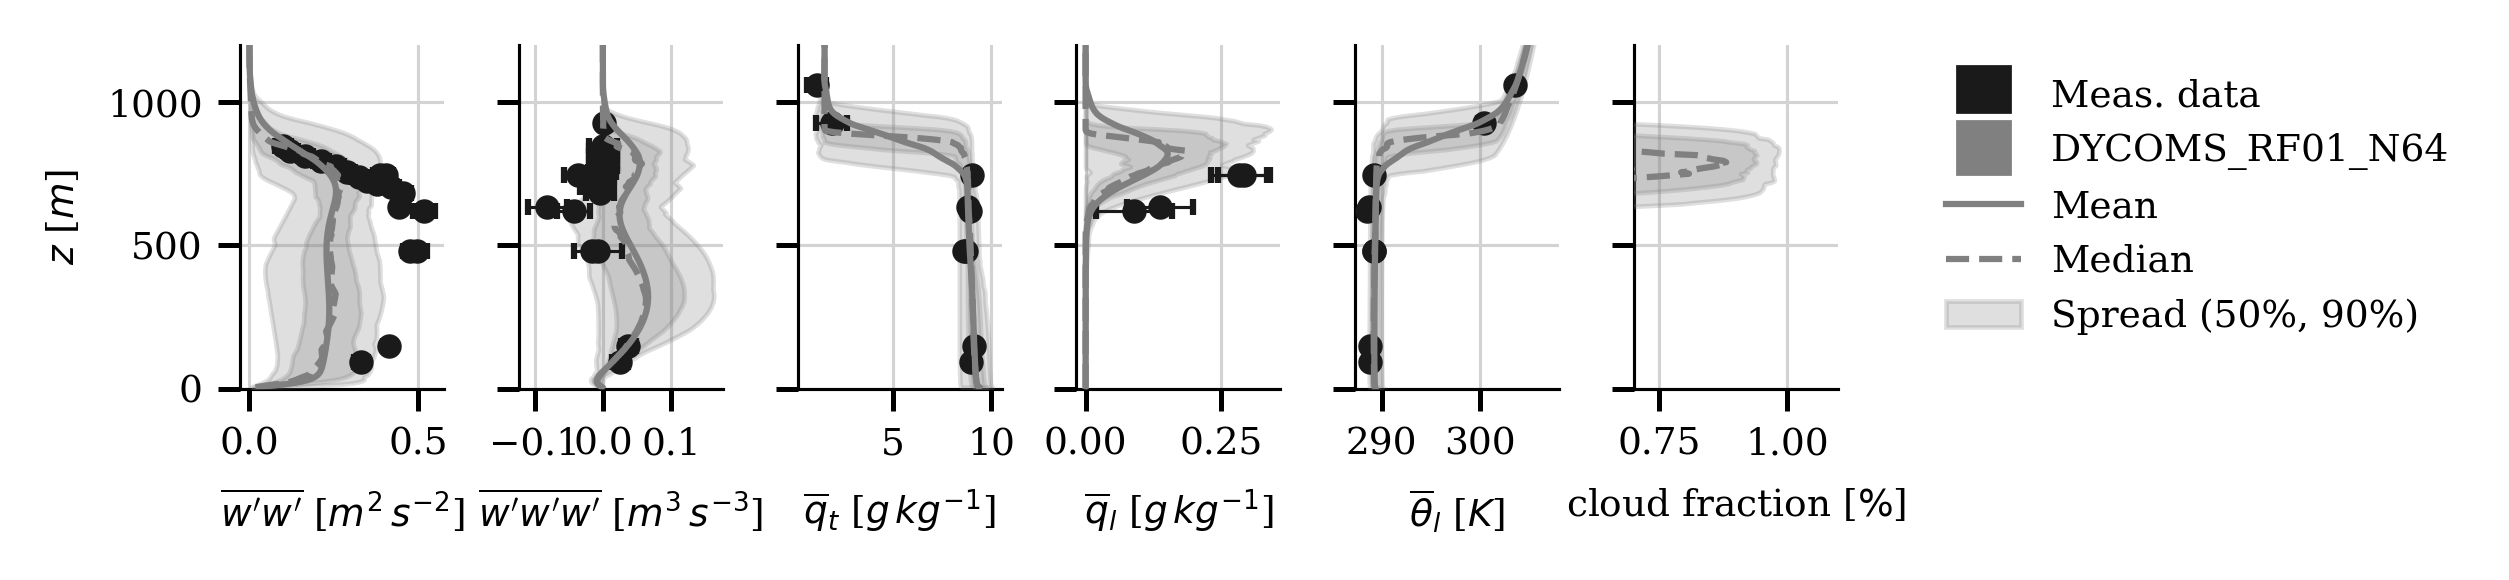

Saved figure  ./data/CENTRAL_FULLRES/DYCOMS_RF01_N64/fig-ensemble_obs_DYCOMS_RF01_N64_profiles


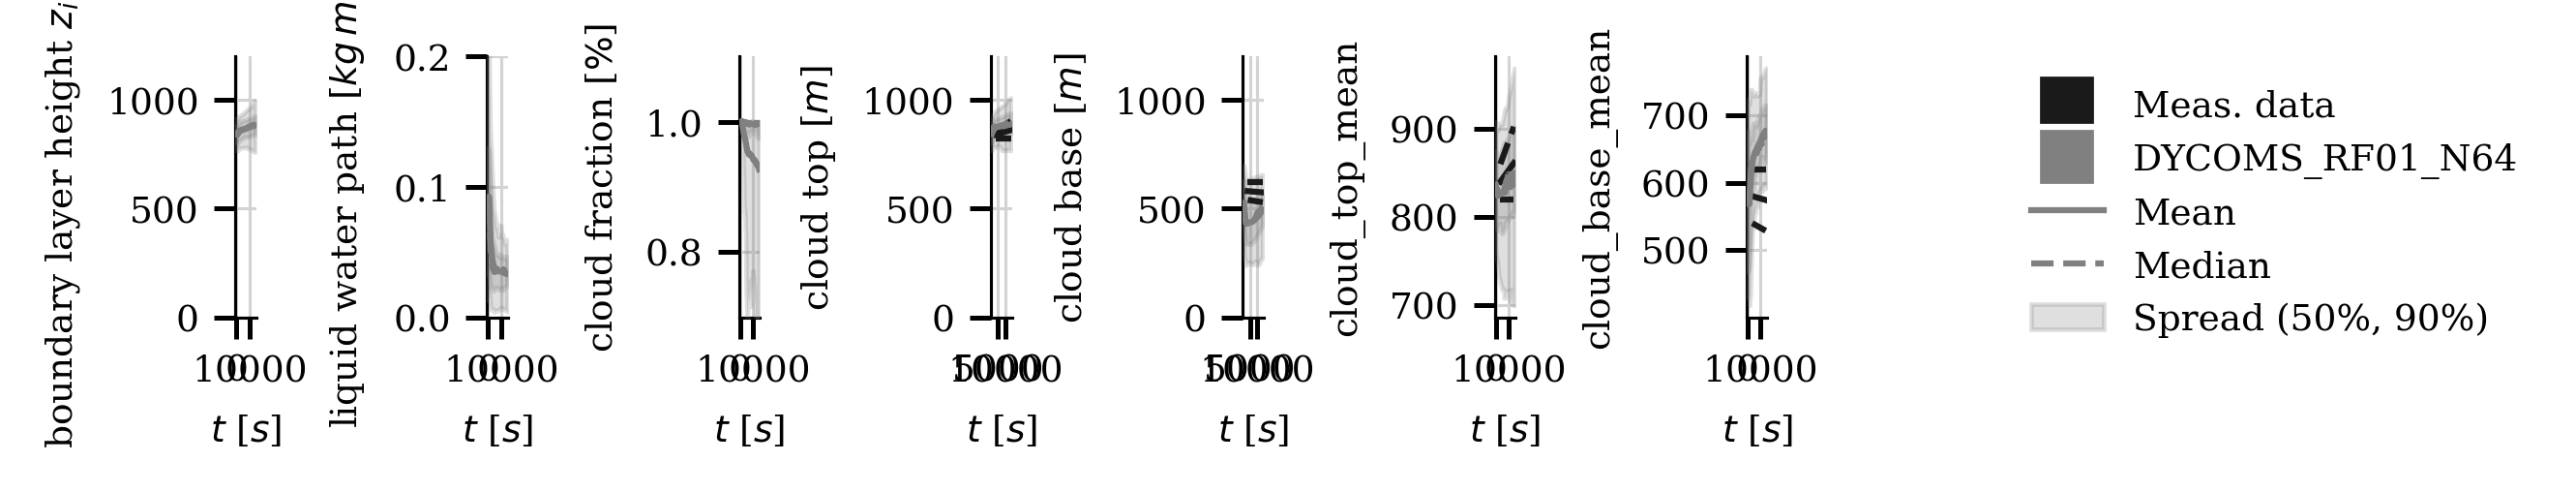

Saved figure  ./data/CENTRAL_FULLRES/DYCOMS_RF01_N64/fig-ensemble_obs_DYCOMS_RF01_N64_timeseries


In [27]:
# after samples finished, prepare evaluation
from data_loaders import load_ens

from calpycles.pycles_ensemble import move_slurm_files

for i, model_name in enumerate(model_names):
    if i==0 or i==1:
        continue
    
    print()
    print(model_name)
    ens = load_ens(model_name)

    # tidy up the ensemble path from slurm stuff
    move_slurm_files(ens.path)

    # clean up each sample: remove all data not needed for evaluation
    # keeping only selected statistics
    for sample in ens.samples:
        sample.clean_files(
            select_stats = True,
            delete_cond_stats = True,
        )
    
    # prepare evaluation
    ens.obs_ens.observe()
    ens.obs_ens.compute_stats()

# for MIXED and CENTRAL:
# Missing 5, namely [4, 25, 26, 45, 47]
# which have low c_s:
# 0.011572198020713463
# 0.00681760047214562
# 0.002102879239135116
# 0.014566467104886629
# 0.004387454180306841